In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp 
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *

In [3]:
from TO_sim.For_ensemble.for_221220 import get_tr
from TO_sim.Utility import Create_Folder

In [36]:
N = 500
seed = 'uniform'
theta_init, omega_init, Kc = Identical(N, 0, seed=seed)
dtheta_init = 0*np.random.random(N)
K = 0.1
m = 3
t_end = 400
dt = 0.1

In [37]:
seed

'uniform'

In [7]:
from tqdm import tqdm
import parmap

In [8]:
DF = 'Review/22.12.20/'
Create_Folder(DF)

In [9]:
import multiprocessing as mp
core = mp.cpu_count()

In [88]:
ms = np.arange(0,24+0.1/2,0.1)
ts = {}
rs = {}
seed = 10
initial_frequecny = 0
for m,(ts[m],rs[m]) in zip(ms,parmap.map(get_tr,ms,K=K,seed=seed,initial_speed=initial_frequecny,pm_processes=core,pm_pbar=True)):pass
# for m in tqdm(ms):
#     ts[m],rs[m]=get_tr(m,K)

  0%|          | 0/241 [00:00<?, ?it/s]

In [41]:
seed

'uniform'

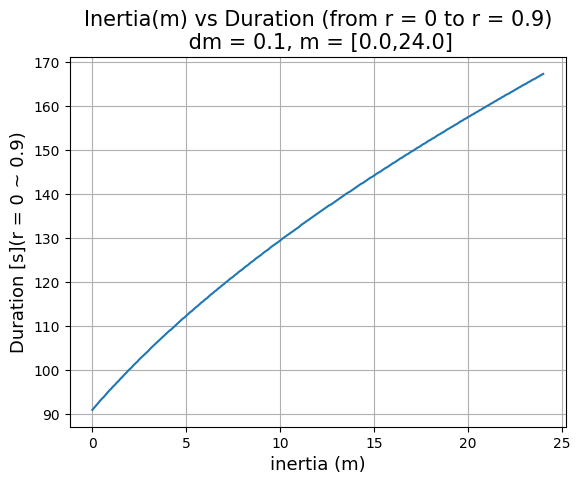

In [100]:
t_09 = []
for m,t,r in zip(ms,ts.values(),rs.values()):
    idx = np.searchsorted(r,0.9)
    t_09.append(t[idx])
plt.plot(ms,t_09)
plt.xlabel('inertia (m)',fontsize=13)
plt.ylabel('Duration [s](r = 0 ~ 0.9)',fontsize=13)
plt.title('Inertia(m) vs Duration (from r = 0 to r = 0.9)'+f'\n dm = 0.1, m = [{ms[0]},{ms[-1]}]',fontsize=15)
plt.grid()

plt.savefig(DF+f'Inertia vs Duration dm = 0.1, m = [{ms[0]},{ms[-1]}].png',dpi=400)

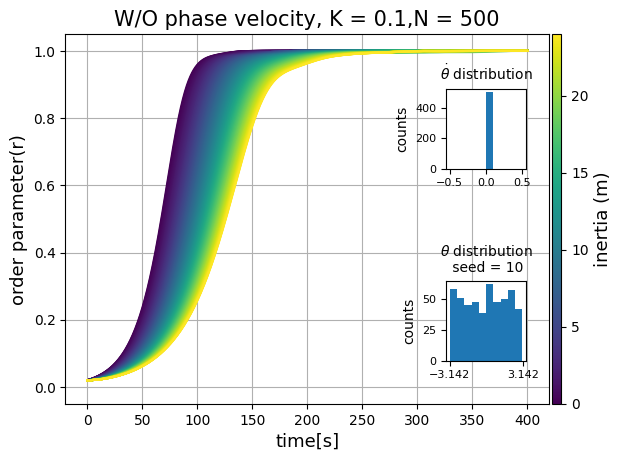

In [90]:
fig = plt.figure(facecolor='white')
ax1 = plt.subplot(111)
color_idx = np.linspace(0.0,1,len(ms))
color = plt.cm.viridis(color_idx)
sca = plt.scatter(0*ms,0*ms,s=0,c=ms)
for i,(t,r) in enumerate(zip(ts.values(),rs.values())):
    plt.plot(t,r,color=color[i],alpha=1)
# plt.xscale('log')
plt.yscale('log')
plt.title(f'W/O phase velocity, K = {K},N = {N}',fontsize=15)
plt.grid()
plt.xlabel('time[s]',fontsize=13)
plt.ylabel('order parameter(r)',fontsize=13)
fig.add_axes([0.72, 0.2, 1/8, 1/6]) 
plt.hist(theta_init)
plt.xticks([-np.pi,np.pi])
plt.title(r'$\theta$ distribution'+f'\n seed = {seed}',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

ax=fig.add_axes([0.72, 0.6, 1/8, 1/6]) 
ax.set_facecolor('white')
plt.hist(dtheta_init)
plt.title(r'$\dot{\theta}$ distribution',fontsize=10)
plt.ylabel('counts')
plt.tick_params(labelsize=8)

divider3 = make_axes_locatable(ax1)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar = fig.colorbar(sca, cax=cax)
cbar.set_label('inertia (m)',fontsize=13)

plt.savefig(DF+f'Identical oscillator linear-log without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
ax1.set_yscale('linear')
plt.savefig(DF+f'Identical oscillator without phase velocity seed = {seed} m = [{ms[0],ms[-1]}].png',dpi=400)
# plt.scatter(np.sin(theta_init[::]),np.cos(theta_init[::]),alpha=0.5,s=5)
